In [ ]:
# Message Framework

## 1. Message Levels
- 레벨 별로 필터링이 가능. 템플릿에서 다른 스타일로 노출 가능.
- DEBUG
- INFO
- SUCCESS
- WARNING
- ERROR<br>
- 메세지 등록 코드:<br>
    - 방법1. messages.add_message(request, messsages.INFO, '새 글이 등록되었습니다.')<br>
    - 방법2. messages.info(request, '새 글이 등록되었습니다.')<br>=> shortcut 형태<br>
<br>
def post_new(request):<br>
&emsp;if form.is_valid():<br> 
        &emsp;&emsp;post = form.save()<br>
        &emsp;&emsp;messages.info(request, '새 글이 등록되었습니다.')<br>
        &emsp;&emsp;return redirect(post)<br>

## 2. Message 등록 VS 소비 
- 등록만 하고 소비 코드를 따로 작성해줘야 실제로 유저에게 메세지가 보여진다.
- 등록 코드: in views.py 
- 소비 코드: in template file.<br>
    => 보통 템플릿마다 message 소비 코드가 들어가므로, **최상위 template file에** 작성.

#### 위 코드에서 'messages' 변수는 어디에서 넘겨받은것인가?
- 보통 templates의 변수들은 views 함수에서 넘겨받는다. 
- 근데 위 template코드를 부르는 views함수를 보면 따로 'messages'라는 변수를 지정해주지 않는다. 
- 그런데 어떻게 변수가 자동 생성된 것인가?<br><br>
- 그 비밀은 messages context_processors 를 통해 message list에 접근할 수 있기 때문! https://github.com/django/django/blob/2.1.5/django/contrib/messages/context_processors.py
    - message.tags 속성을 통해 level 제공
    - message.message 속성을 통해 '내용' 제공 (=str(message))
    <br><br>
- 즉, 템플릿에서 쓸 변수목록을 템플릿 렌더링 요청 시에 넘기지 않아도, 독립적으로 Context Processor 함수가 호출되어, 그 리턴값 (사전 타입)을 모아서 템플릿에서 참조 
- project 폴더의 settings.py :
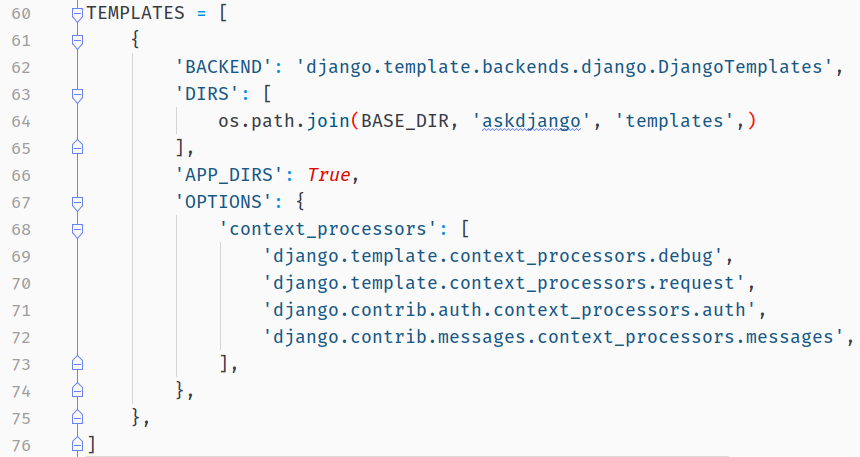

## 3. Bootstrap Alert 스타일로 메세지 노출하기
- bootstrap alert class-name : alert-info, alert-success, alert-warning, alert-danger
- message tags: debug, info, success, warning, error
<br><br>
- bootstrap 측에서는 "danger", message 측에서는 "error"로 정의되어있음:<br>이 간극을 해결하는 코드는 settings.py에 configure 할 수 있음.<br>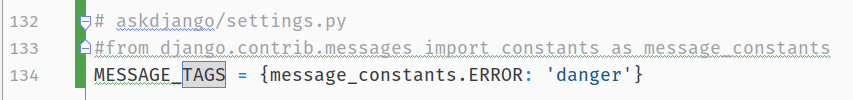

- bootstrap 측에 alert-debug 스타일이 없음 
- 아래와 같이 만들 수 있음

- Tip: 장고 기본설정으로 debug 메세지는 무시되고 있음. debug-level을 쓰려면 settings.Message_LEVEL을 변경해야함.

## 4. Django-bootstrap3의 bootstrap_messages
- third party app
- {% bootstrap_messages %}